In [51]:
import numpy as np
import RandomMatrix as rm
import matplotlib.pyplot as plt

In [ ]:
# create png flag for saving figures
create_png = False

# the number of targets
#n_values = [4, 6, 10, 20, 40, 80, 100, 200, 240, 400, 800, 1000]
n_values = [20, 40, 80, 100, 200, 320, 400, 480, 640, 800, 1000]
n_values_np = np.array(n_values)

# the distribution of the targets
# 'normal' for normal distribution, 'uniform' for uniform distribution
distribution = 'uniform' # 'normal', 'uniform', 'cube', 'sphere', 'circle', 'student_t'

# which space dimension to use, totally experimental
space_dimension = 3

# 'correlated' for correlated matrices, 'uncorrelated' for uncorrelated matrices
# Note: Uncorrelated matrices are not yet supported in the MatrixInverseDistance3D class
correlated = True 


# use a different exponent
exponent = -1 # -1 for inverse distance, -2 for inverse square distance, etc.
logarithmic = False # use logarithmic scaling in this case exponent is ignored
logscale = 0.05 # the scale of the logarithmic distribution

# hardcore is the minimum distance between targets
hardcore = 0.001 # minimum distance between targets, 0.0 means no

# is the ensemble scaled?
scaled = False

# the goe spacing range
goe_spacing_range = 2

# the sample size of the first simulation
sample_size_first = 4000
sample_strategy = 'nsqrt' # 'homogenous', 'nsqrt' or 'n'

# generare the sample sizes for each n
sample_values = []
for n in n_values:
    if sample_strategy == 'homogenous':
        sample_value = sample_size_first
    elif sample_strategy == 'nsqrt':
        sample_value = sample_size_first * np.sqrt( n_values[0] / n )
    elif sample_strategy == 'n':
        sample_value = sample_size_first * ( n_values[0] / n ) 
    else:
        raise ValueError("Unknown sample strategy: {}".format(sample_strategy))
    if sample_value < 1:
        sample_value = 1
    else:
        sample_value = int(sample_value)
    sample_values.append(sample_value)
    
print("N values:", n_values)
print("Sample values:", sample_values)

matrices = []
matrices_correlated = []
simulations = []
simulations_correlated = []
for n in n_values:
    G = rm.MatrixInverseDistance(n, distribution=distribution, 
                                        scaled=scaled, 
                                        exponent=exponent,
                                        logarithmic=logarithmic, 
                                        logscale=logscale,
                                        hardcore=hardcore,
                                        dimension=space_dimension,
                                        correlated=True)
    matrices.append(G)
    S = rm.Simulation(G)
    S.Matrix.measure_covariance = True
    simulations.append(S)

N values: [20, 40, 80, 100, 200, 320, 400, 480, 640, 800, 1000]
Sample values: [4000, 2828, 2000, 1788, 1264, 1000, 894, 816, 707, 632, 565]
MatrixInverseDistance initialized with parameters:
N: 20, scaled: False, distribution: uniform, hardcore: 0.001, solver: numpy, correlated: True, exponent: -1, logarithmic: False, logscale: (0.05,), space_dimension: 3
MatrixInverseDistance initialized with parameters:
N: 40, scaled: False, distribution: uniform, hardcore: 0.001, solver: numpy, correlated: True, exponent: -1, logarithmic: False, logscale: (0.05,), space_dimension: 3
MatrixInverseDistance initialized with parameters:
N: 80, scaled: False, distribution: uniform, hardcore: 0.001, solver: numpy, correlated: True, exponent: -1, logarithmic: False, logscale: (0.05,), space_dimension: 3
MatrixInverseDistance initialized with parameters:
N: 100, scaled: False, distribution: uniform, hardcore: 0.001, solver: numpy, correlated: True, exponent: -1, logarithmic: False, logscale: (0.05,), space

In [174]:
for S in simulations:
    S.random_seed(42)
    sample_size = sample_values[simulations.index(S)]
    print("n =", S.Matrix.N, "Sample size =", sample_size, "Randomness:", 3*S.Matrix.N*sample_size)
    S.sample(sample_size)
    print("Finished with hardcore count:", S.Matrix.hardcore_count, ", element average:", S.element_average)
    print("Element variance:", S.element_variance, ", one vertex covariance:", S.one_vertex_covariance)

n = 20 Sample size = 4000 Randomness: 240000
Finished with hardcore count: 0.0 , element average: 1.2008378785370168
Element variance: 0.8061296171207555 , one vertex covariance: 0.016966702157839204
n = 40 Sample size = 2828 Randomness: 339360
Finished with hardcore count: 0.0 , element average: 1.2008769688471204
Element variance: 0.7928715924859078 , one vertex covariance: 0.01740592951734267
n = 80 Sample size = 2000 Randomness: 480000
Finished with hardcore count: 0.0 , element average: 1.199684762358546
Element variance: 0.792406594790791 , one vertex covariance: 0.016973983903187998
n = 100 Sample size = 1788 Randomness: 536400
Finished with hardcore count: 0.0 , element average: 1.1991644960884993
Element variance: 0.7846238211933325 , one vertex covariance: 0.017055455717748535
n = 200 Sample size = 1264 Randomness: 758400
Finished with hardcore count: 0.0 , element average: 1.19956600825123
Element variance: 0.7949931638422933 , one vertex covariance: 0.016958234709299188
n =

In [ ]:
eigenvalues_perron_average = []
eigenvalues_perron_std = []
element_average = []
row_sum_average = []
row_sum_average_std = []
predicted_pf_eigenvalues0 = []
predicted_pf_eigenvalues2 = []
predicted_pf_eigenvaluess = []
localization_index = []
localization_index_std = []
localization_index_tail = []
row_sum_average = []
row_sum_average_std = []

# use the last simulation to get the covariance, variance and average
S = simulations[-1]
hm = S.one_vertex_covariance
vm = S.element_variance
gm = S.element_average

if S.Matrix.distribution == 'uniform':
    # the theoretial values, hand computed and hardcoded
    h = 0.017 # computed value for the one vertex covariance
    g = 1.2  # computed value of the element average
    v = 81/100  # computed value for the variance
else:
    print("Using the last simulation to get the covariance, variance and average")
    h = hm
    v = vm
    g = gm

print(f"One vertex covariance: {hm:.4f}, Element variance: {vm:.4f}, Element average: {gm:.4f}")
print(f"Predicted h: {h:.4f}, Predicted v: {v:.4f}, Predicted g: {g:.4f}")

def uncorrelated_prediction(n, v, g):
    return (n - 1) + (n - 1) * (n - 2) / n**2 / g**2 * (v)

def correlated_prediction(n, h, v, g):
    return (n - 1) + (n - 1) * (n - 2) / n**2 / g**2 * ( (n -4) * h + v )

def self_consistent_prediction(n, h, v, g):
    # This is a self-consistent prediction based on the element average and variance
    d = (n - 1) * (n - 2) / n * ((n - 4) * h + v) / g**2
    return (n - 2) / 2 * (1 + np.sqrt(1  + 4 * (d + n - 1 )/ (n - 2) ** 2))

# Collect the Perron Frobenius eigenvalues from the simulations
for S in simulations:
    n = S.Matrix.N
    # get the averaged Perron Frobenius eigenvalues
    eigenvalue_perron = S.eigenvalues_averages[-1]  # the last eigenvalue is the Perron Frobenius eigenvalue
    eigenvalue_perron_std = S.eigenvalues_standard_deviation[-1]  # standard deviation of the Perron Frobenius eigenvalue
    eigenvalues_perron_average.append(eigenvalue_perron)
    eigenvalues_perron_std.append(eigenvalue_perron_std)
    # process the localization index
    localization_index_array = S.localization_index[:,-1]  # the last vector is the Perron Frobenius eigenvalue
    loc_mean = np.mean(localization_index_array)
    loc_std = np.std(localization_index_array)
    localization_index_tail.append(np.mean(localization_index_array[localization_index_array > loc_mean + 8 * loc_std]))
    localization_index_array = localization_index_array[localization_index_array < loc_mean + 6 * loc_std]  # remove outliers
    localization_index_tail.append(np.mean(localization_index_array[localization_index_array > loc_mean + 6 * loc_std]))
    localization_index.append(np.mean(localization_index_array))
    localization_index_std.append(np.std(localization_index_array))
    # print the results
    print(f"N = {n}, Perron Eigenvalue: {eigenvalue_perron:.4f} ± {eigenvalue_perron_std:.4f}")
    print(f"Localization index: {localization_index[-1]:.4f}")
    element_average.append(S.element_average)
    # row_sum_average.append(S.element_average * ( S.Matrix.N - 1 ))
    # row_sum_average_std.append(np.sqrt((S.Matrix.N - 1) * S.element_variance))
    rowsums = S.rowsum.flatten()  # the last vector is the Perron Frobenius eigenvalue
    row_sum_average.append(np.mean(rowsums))
    row_sum_average_std.append(np.std(rowsums))
    predicted_pf_eigenvalues0.append(uncorrelated_prediction(n, v, g))
    predicted_pf_eigenvalues2.append(correlated_prediction(n, h, v, g))
    predicted_pf_eigenvaluess.append(self_consistent_prediction(n, h, v, g))

eigenvalues_perron = np.array(eigenvalues_perron_average)
eigenvalues_perron_std = np.array(eigenvalues_perron_std)
element_average = np.array(element_average)
row_sum_average = np.array(row_sum_average)
row_sum_average_std = np.array(row_sum_average_std)
predicted_pf_eigenvalues0 = np.array(predicted_pf_eigenvalues0)
predicted_pf_eigenvalues2 = np.array(predicted_pf_eigenvalues2)

# scale the data by the element average to remove the length scale
eigenvalues_perron_average = eigenvalues_perron_average / element_average
eigenvalues_perron_std = eigenvalues_perron_std / element_average


One vertex covariance: 0.0171, Element variance: 0.8026, Element average: 1.2000
Predicted h: 0.0170, Predicted v: 0.8100, Predicted g: 1.2000
N = 20, Perron Eigenvalue: 23.8834 ± 3.2452
Localization index: 0.0618
N = 40, Perron Eigenvalue: 48.2513 ± 3.2572
Localization index: 0.0293
N = 80, Perron Eigenvalue: 96.8035 ± 3.8472
Localization index: 0.0140
N = 100, Perron Eigenvalue: 121.0233 ± 3.7385
Localization index: 0.0110
N = 200, Perron Eigenvalue: 242.5379 ± 4.6228
Localization index: 0.0054
N = 320, Perron Eigenvalue: 388.6502 ± 5.6607
Localization index: 0.0034
N = 400, Perron Eigenvalue: 485.8637 ± 7.0180
Localization index: 0.0027
N = 480, Perron Eigenvalue: 583.1337 ± 6.6782
Localization index: 0.0022
N = 640, Perron Eigenvalue: 777.4293 ± 7.5304
Localization index: 0.0017
N = 800, Perron Eigenvalue: 971.9088 ± 8.5135
Localization index: 0.0013
N = 1000, Perron Eigenvalue: 1215.2811 ± 9.2009
Localization index: 0.0011


In [252]:
create_png = True

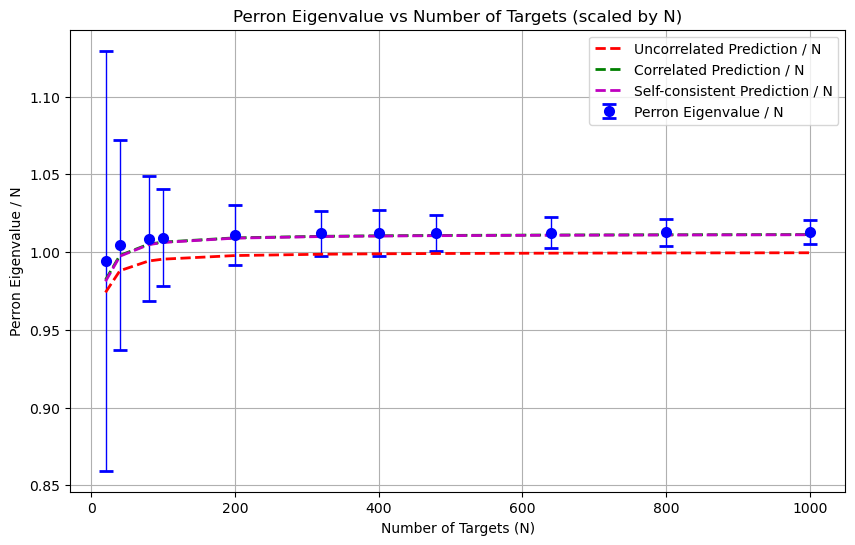

In [253]:
# plot values divided by N 
plt.figure(figsize=(10, 6))
plt.errorbar(n_values, eigenvalues_perron_average / n_values_np, 
             yerr=eigenvalues_perron_std / n_values_np,
             fmt='o', label='Perron Eigenvalue / N', color='blue',
             capsize=5, elinewidth=1, markeredgewidth=2)
plt.plot(n_values, predicted_pf_eigenvalues0 / n_values_np, 'r--', label='Uncorrelated Prediction / N', linewidth=2)
plt.plot(n_values, predicted_pf_eigenvalues2 / n_values_np, 'g--', label='Correlated Prediction / N', linewidth=2)
plt.plot(n_values, predicted_pf_eigenvaluess / n_values_np, 'm--', label='Self-consistent Prediction / N', linewidth=2)
plt.xlabel('Number of Targets (N)')
plt.ylabel('Perron Eigenvalue / N')
plt.title('Perron Eigenvalue vs Number of Targets (scaled by N)')
#plt.ylim(0.9, 1.1)  # limit y-axis to avoid too large values
plt.legend()
plt.grid(True)
if create_png:
    plt.savefig('eigenvalues_perron_scaled.png', dpi=300, bbox_inches='tight')
plt.show()

In [254]:
projections_perron = []
projections_perron_std = []

for S in simulations:
    n = S.Matrix.N
    projection_perron = S.projections[:,-1]  # the last projections are the Perron Frobenius projections
    projection_perron = np.array(projection_perron)
    projection_perron = np.abs(projection_perron) / np.sqrt(n)  # normalize the projections
    print(f"N = {n}, Perron Projections: {np.mean(projection_perron):.4f} ± {np.std(projection_perron):.4f}")
    projections_perron.append(np.mean(projection_perron))
    projections_perron_std.append(np.std(projection_perron))

N = 20, Perron Projections: 0.9727 ± 0.0459
N = 40, Perron Projections: 0.9810 ± 0.0325
N = 80, Perron Projections: 0.9869 ± 0.0249
N = 100, Perron Projections: 0.9883 ± 0.0194
N = 200, Perron Projections: 0.9908 ± 0.0088
N = 320, Perron Projections: 0.9912 ± 0.0092
N = 400, Perron Projections: 0.9909 ± 0.0212
N = 480, Perron Projections: 0.9920 ± 0.0011
N = 640, Perron Projections: 0.9922 ± 0.0008
N = 800, Perron Projections: 0.9921 ± 0.0072
N = 1000, Perron Projections: 0.9924 ± 0.0007


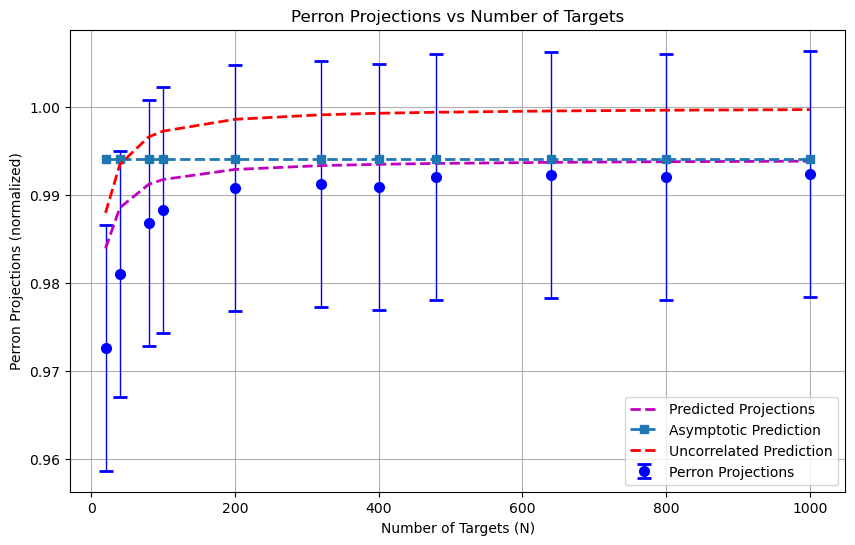

In [255]:
def projection_prediction(n, v, g, h):
    return 1 - 1 / (2 * n**2 * g**2) * (n - 2) * (n - 1) / n * ( (n - 4) * h + v )

def projection_asymptotic_prediction(n, v, g, h):
    return 1 - 1 / (2 * g**2) * (h) + n * 0

n_values_np = np.array(n_values)
predicted_projections = projection_prediction(n_values_np, v, g, h)
predicted_projections_uncorr = projection_prediction(n_values_np, v, g, 0)
predicted_projections_asymptotic = projection_asymptotic_prediction(n_values_np, v, g, h)

# print("Predicted Projections:", predicted_projections)
# print("Predicted Projections Asymptotic:", predicted_projections_asymptotic)

plt.figure(figsize=(10, 6))
plt.errorbar(n_values, projections_perron, 
             yerr=np.std(projections_perron_std), fmt='o', 
             label='Perron Projections', color='blue',
             capsize=5, elinewidth=1, markeredgewidth=2)
plt.plot(n_values, predicted_projections, 'm--', label='Predicted Projections', linewidth=2)
plt.plot(n_values, predicted_projections_asymptotic, 's--', label='Asymptotic Prediction', linewidth=2)
plt.plot(n_values, predicted_projections_uncorr, 'r--', label='Uncorrelated Prediction', linewidth=2)
plt.xlabel('Number of Targets (N)')
plt.ylabel('Perron Projections (normalized)')
plt.title('Perron Projections vs Number of Targets')
plt.legend()
plt.grid(True)
if create_png:
    plt.savefig('eigenvalues_perron_projections.png', dpi=300, bbox_inches='tight')
plt.show()

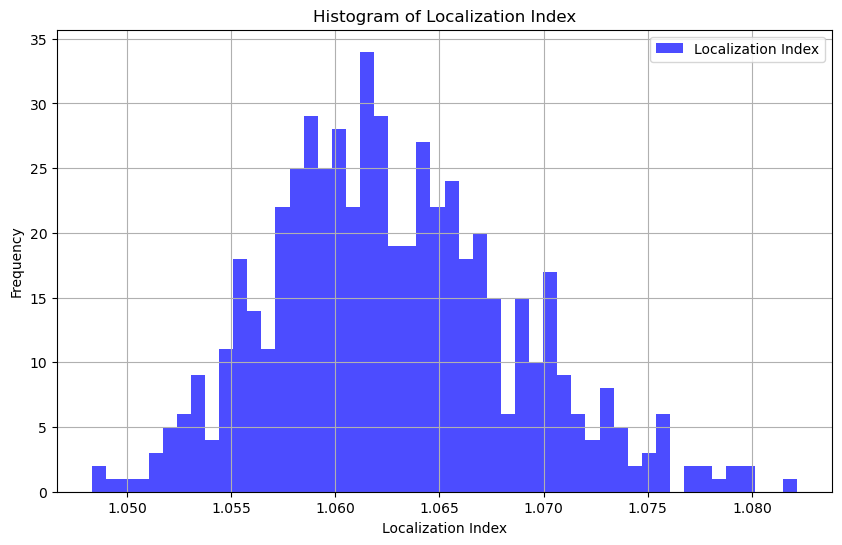

In [266]:
S = simulations[-1]  # use the last simulation for the localization index
filtered_localization_index = S.localization_index[:,-1] * S.Matrix.N  # the last vector is the Perron Frobenius eigenvalue
filtered_localization_index = np.array(filtered_localization_index)
filtered_localization_index = filtered_localization_index[filtered_localization_index < 6]
plt.figure(figsize=(10, 6))
plt.hist(filtered_localization_index, bins=50, 
         label='Localization Index', color='blue', alpha=0.7)
plt.xlabel('Localization Index')
plt.ylabel('Frequency')
plt.title('Histogram of Localization Index')
plt.legend()
plt.grid(True)
if create_png:
    plt.savefig('localization_index_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

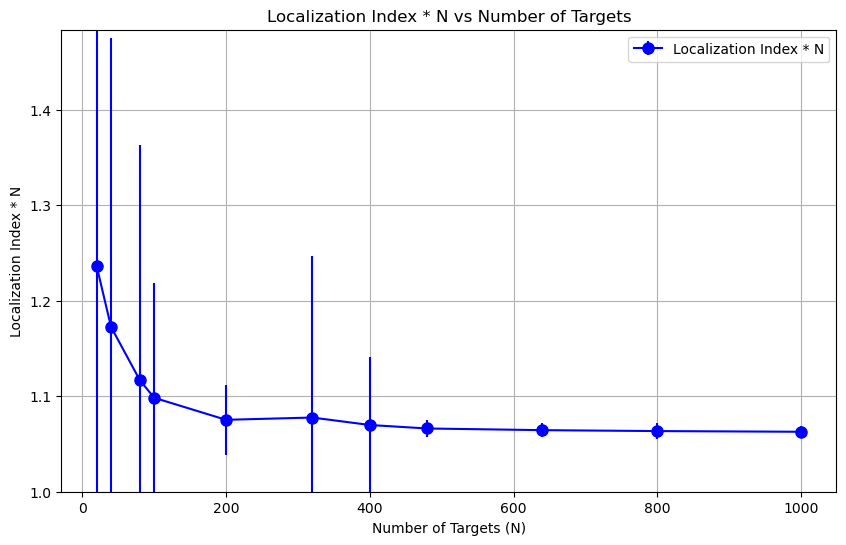

In [263]:
x_values = np.linspace(np.min(n_values_np), np.max(n_values_np), 100)
plt.figure(figsize=(10, 6))
plt.errorbar(n_values, localization_index * n_values_np, yerr=localization_index_std * n_values_np, fmt='o-', label='Localization Index * N', color='blue', markersize=8)
#plt.plot(n_values, np.array(localization_index) * n_values_np, 'o-', label='Localization Index * N', color='blue', markersize=8)
plt.xlabel('Number of Targets (N)')
plt.ylabel('Localization Index * N')
plt.title('Localization Index * N vs Number of Targets')
plt.ylim(1.0, np.max(localization_index * n_values_np) * 1.2)  # limit y-axis to avoid too large values
plt.legend()
plt.grid(True)
if create_png:
    plt.savefig('localization_index.png', dpi=300, bbox_inches='tight')
plt.show()

In [258]:
print(localization_index * n_values_np)
print(localization_index_std * n_values_np)

[1.23643154 1.17264471 1.11688032 1.09836547 1.0752928  1.0776652
 1.06985679 1.06620508 1.06445989 1.06350485 1.06277229]
[0.39138903 0.30233337 0.24627825 0.12018336 0.03673939 0.16944427
 0.07113347 0.00940056 0.00744401 0.00800846 0.00581187]


In [259]:
row_sum_average = np.array(row_sum_average) # always yield N-1 for now
row_sum_average_std = np.array(row_sum_average_std) # always yield N-1 for now
row_sum_variance = row_sum_average_std * row_sum_average_std

print("Row sum average variance:", row_sum_variance)

Row sum average variance: [   21.11907486    56.71757965   167.1938098    243.14978967
   826.39200362  1998.6216952   3040.47809168  4321.75154856
  7489.6589195  11536.21440857 17883.45369316]


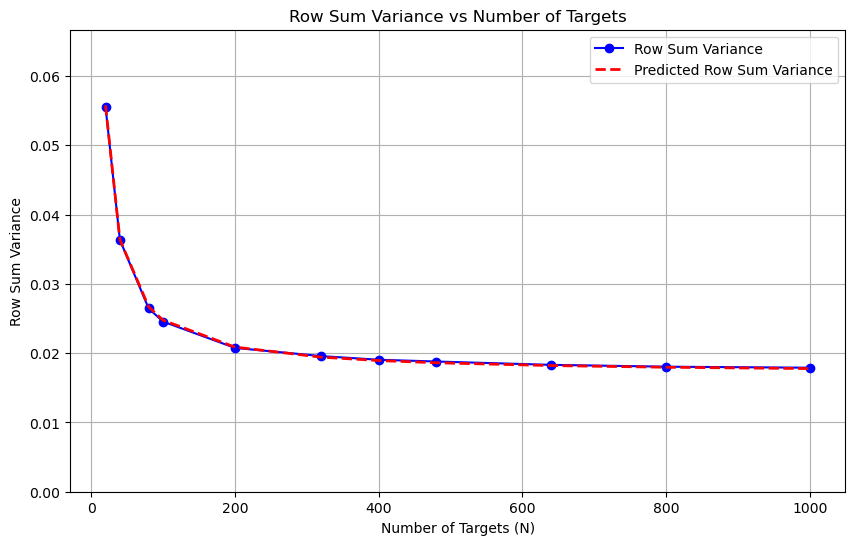

In [267]:
def row_sum_variance_prediction(n, v ,h):
    rvar = (n - 1) * v + (n -1) * (n -2) * h 
    return rvar / n / (n - 1)


plt.figure(figsize=(10, 6))
plt.plot(n_values, row_sum_variance / n_values_np / ( n_values_np - 1), 
         label='Row Sum Variance', color='blue', marker='o')
plt.plot(n_values, row_sum_variance_prediction(n_values_np, v, h), 
         'r--', label='Predicted Row Sum Variance', linewidth=2)
plt.xlabel('Number of Targets (N)')
plt.ylabel('Row Sum Variance')
plt.title('Row Sum Variance vs Number of Targets')
plt.legend()
plt.grid(True)
plt.ylim(0, np.max(row_sum_variance / n_values_np / ( n_values_np - 1)) * 1.2)  # limit y-axis to avoid too large values
if create_png:
    plt.savefig('row_sum_variance.png', dpi=300, bbox_inches='tight')
plt.show()